<a href="https://colab.research.google.com/github/theclosedbook/GAN_Test/blob/main/Test_Carbon_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Check TensorFlow version
import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.15.0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import zipfile

def unzip_data(filename):
    """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
    zip_ref = zipfile.ZipFile(filename, "r")
    zip_ref.extractall()
    zip_ref.close()

In [25]:
unzip_data("/binary_CZ_XRM_Carbon_HR_0.34um.zip")

In [21]:
import os
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [27]:
# Infomation about the file
walk_through_dir("binary_CZ_XRM_Carbon_HR_0.34um")

There are 0 directories and 310 images in 'binary_CZ_XRM_Carbon_HR_0.34um'.


In [36]:
import tensorflow as tf
from PIL import Image
import os

# Specify the directory containing the TIFF images
data_dir = 'binary_CZ_XRM_Carbon_HR_0.34um'

# Get the list of TIFF image file paths
image_paths = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.tif') or f.endswith('.tiff')]

# Create a dataset from the image paths
dataset = tf.data.Dataset.from_tensor_slices(image_paths)

# Define a function to load and preprocess the images
def load_image(file_path):
    try:
        image = tf.io.read_file(file_path)
        image = tf.image.decode_image(image, channels=1)  # Assumes grayscale images, use channels=3 for RGB
        if image.shape.ndims is not None:
            image = tf.image.resize(image, [224, 224])  # Resize the image to desired size
            image = tf.cast(image, tf.float32) / 255.0  # Normalize the image
        else:
            print(f"Skipping image with invalid shape: {file_path}")
            image = tf.zeros([224, 224, 1], dtype=tf.float32)  # Return a placeholder image
    except tf.errors.InvalidArgumentError:
        print(f"Skipping invalid image: {file_path}")
        image = tf.zeros([224, 224, 1], dtype=tf.float32)  # Return a placeholder image
    return image

# Map the load_image function to each image path
dataset = dataset.map(load_image)

# Specify other dataset parameters
batch_size = 32
shuffle = True

# Apply batching and shuffling to the dataset
dataset = dataset.batch(batch_size)
if shuffle:
    dataset = dataset.shuffle(buffer_size=len(image_paths))

Skipping image with invalid shape: Tensor("args_0:0", shape=(), dtype=string)


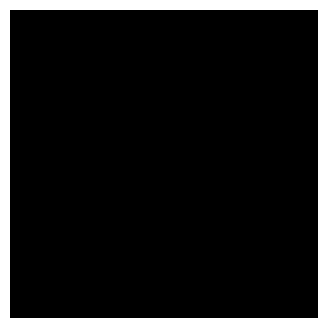

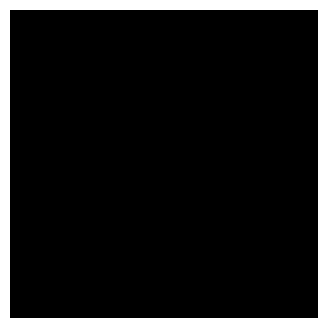

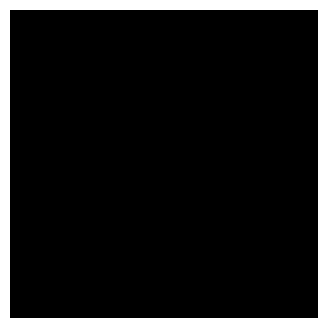

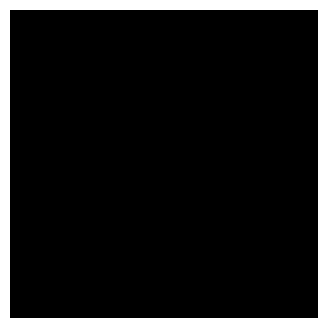

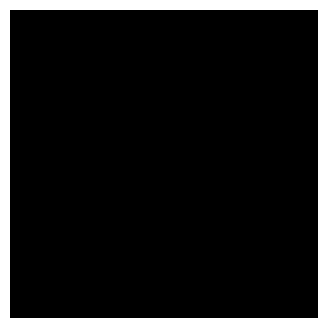

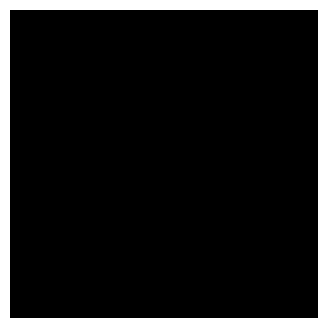

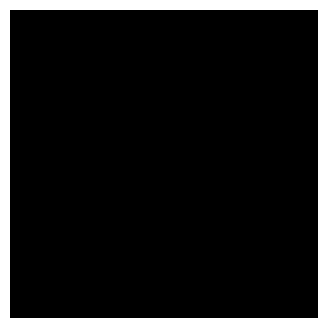

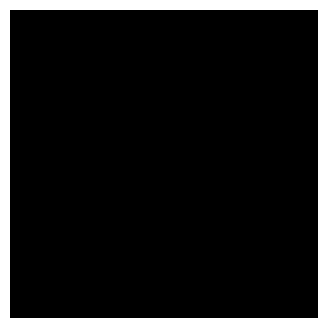

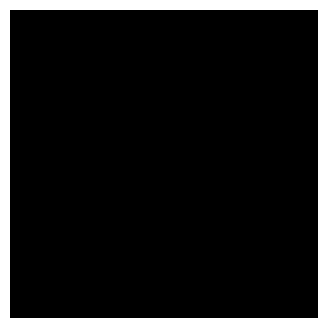

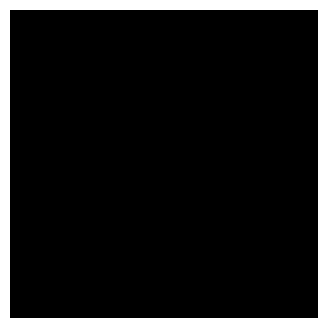

In [43]:
import matplotlib.pyplot as plt

# Iterate over the dataset
for batch in dataset:
    # Display the first image from each batch
    plt.figure(figsize=(4, 4))
    plt.imshow(batch[1].numpy().squeeze(), cmap='gray')
    plt.axis('off')
    plt.show()